In [1]:
import json
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

# Classification

In [2]:
def encode_results():
    results_data = pd.read_csv("../results/specified_dietary_tags_classification_v3.csv")
    results_data_transformed_rows = []
    for _, row in results_data.iterrows():
        ingrds = row['gpt-3_classification']
        # Postprocessing results to only extract json with model Classification
        ingrds = ingrds[ingrds.find('{'):]
        json_row = json.loads(ingrds)
        results_data_transformed_rows.append(json_row)

    return pd.DataFrame(results_data_transformed_rows).astype(int)

In [3]:
results_df = encode_results()

In [4]:
results_df

,vegetarian,vegan,sweet,seafood,meat,restricted_diet,low-sodium,low-carb,healthy,low-cholesterol,low-calorie,low-protein,low-saturated-fat,low-fat,dairy,nuts,diabetic,kosher
0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,1,1,1,1,0,1,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
266,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
267,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
268,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
target_data = pd.read_csv("../results/llm_sampled_data.csv").iloc[:, :-2].astype(int)

In [6]:
target_data.columns = [f'{col}_gt' for col in target_data.columns]

In [7]:
target_data.head()

,vegetarian_gt,vegan_gt,sweet_gt,seafood_gt,meat_gt,restricted_diet_gt,low-sodium_gt,low-carb_gt,healthy_gt,low-cholesterol_gt,low-calorie_gt,low-protein_gt,low-saturated-fat_gt,low-fat_gt,dairy_gt,nuts_gt,diabetic_gt,kosher_gt
0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [8]:
target_data = target_data.iloc[:results_df.shape[0]]

In [21]:
def save_classification_results(results_df, target_data):
    for tag in results_df.columns:
        r = classification_report(y_true=target_data[f'{tag}_gt'], y_pred=results_df[tag])
        with open(f'../results/classification_results/{tag}.txt', 'w') as f:
            f.write(r)
        conf_mat = confusion_matrix(y_true=target_data[f'{tag}_gt'], y_pred=results_df[tag])
        df_cfm = pd.DataFrame(conf_mat)
        plt.figure(figsize=(10, 10))
        cfm_plot = sns.heatmap(df_cfm, annot=True)
        cfm_plot.figure.savefig(f"../results/classification_results/{tag}.png")

/home/mchraba/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mchraba/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mchraba/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


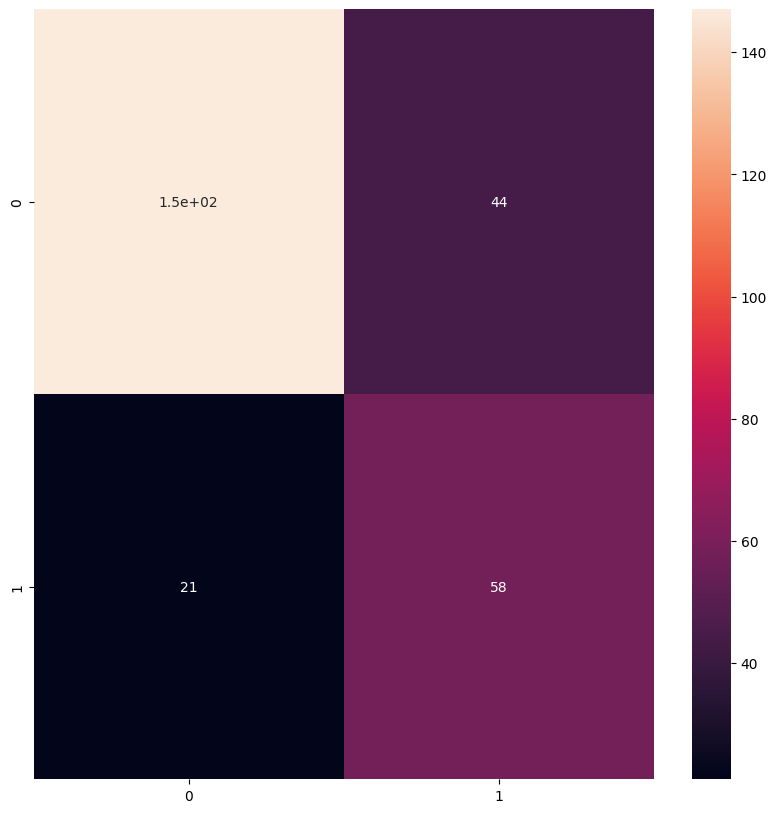

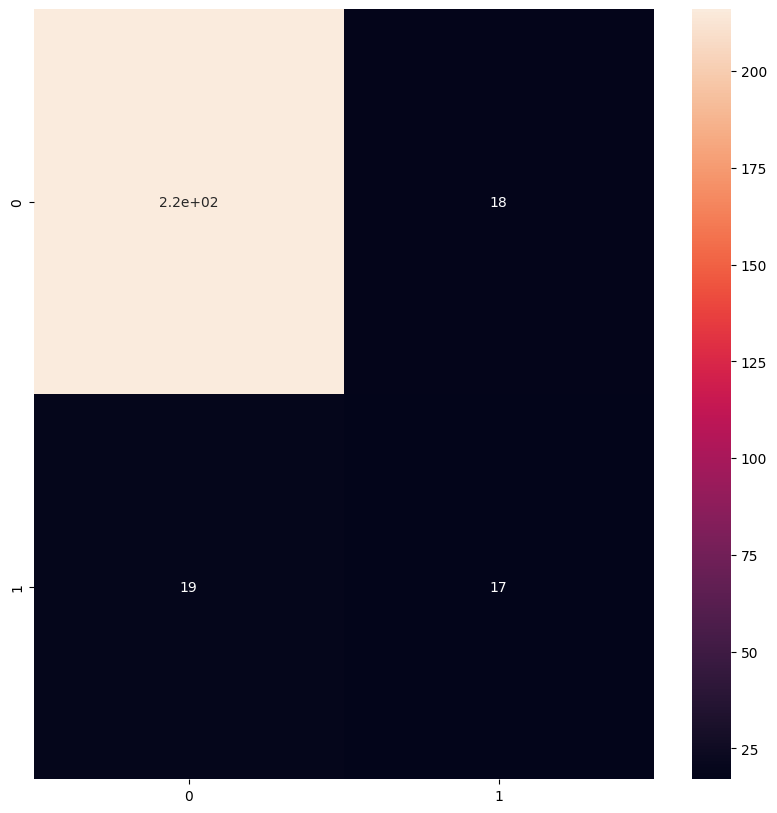

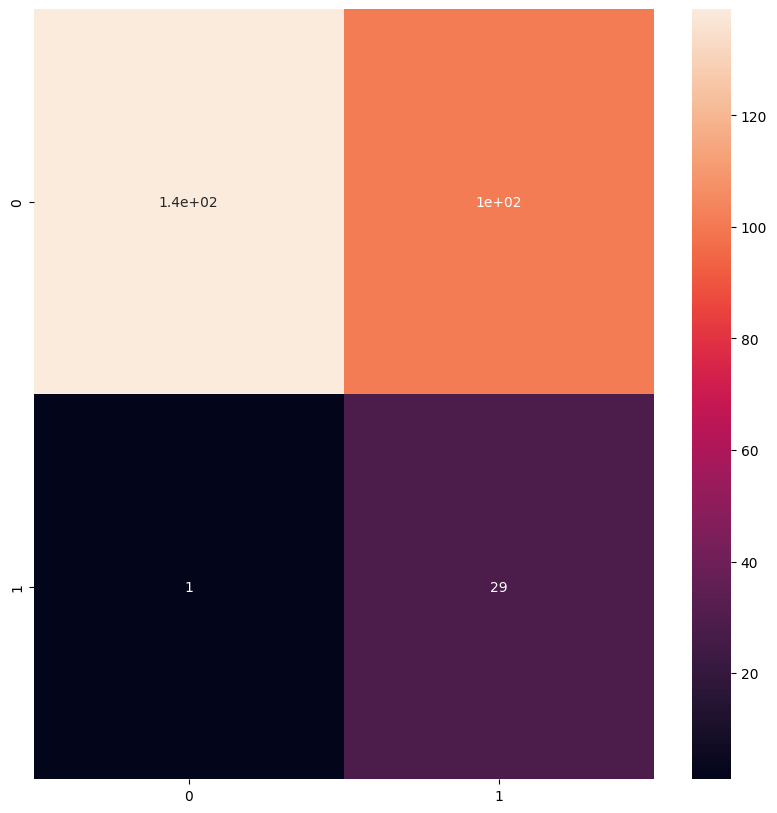

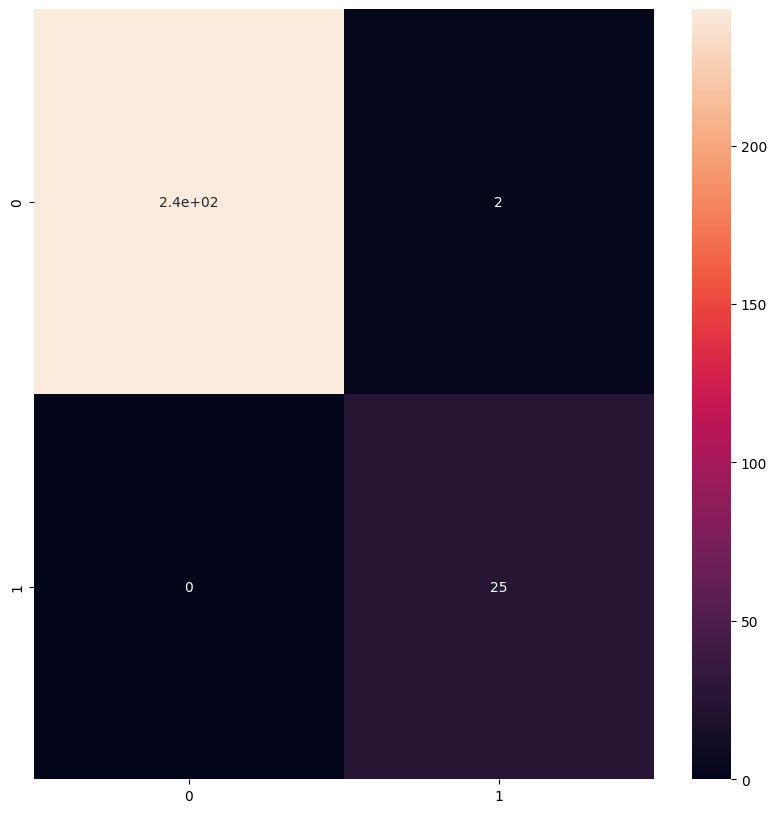

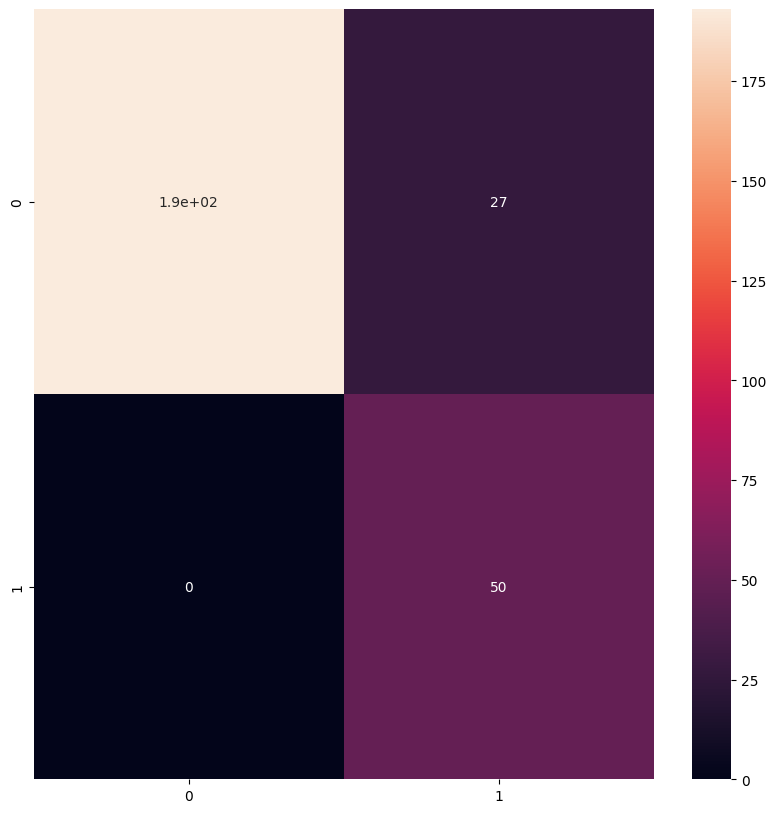

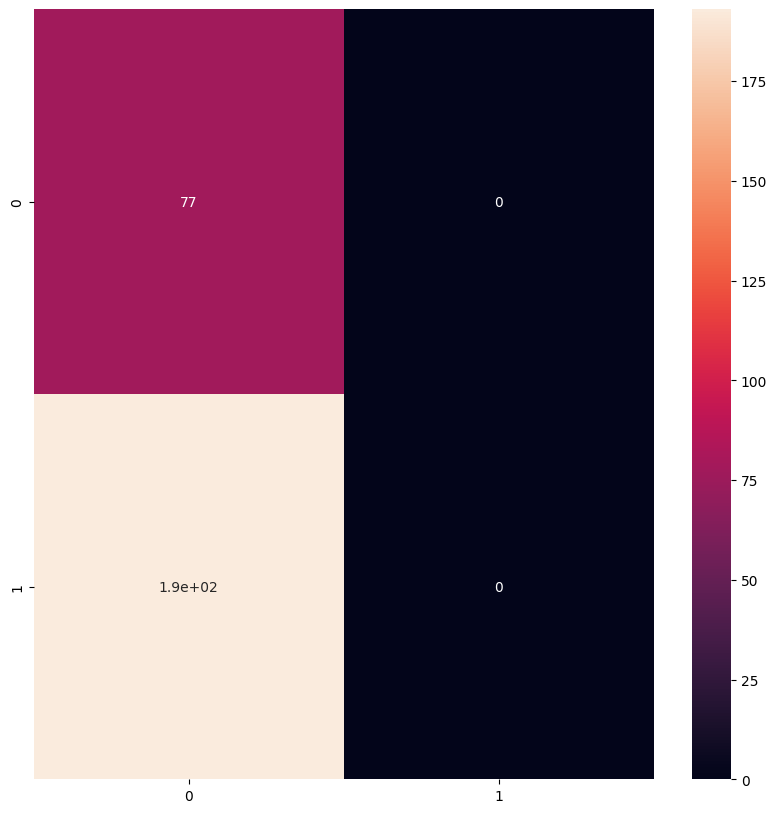

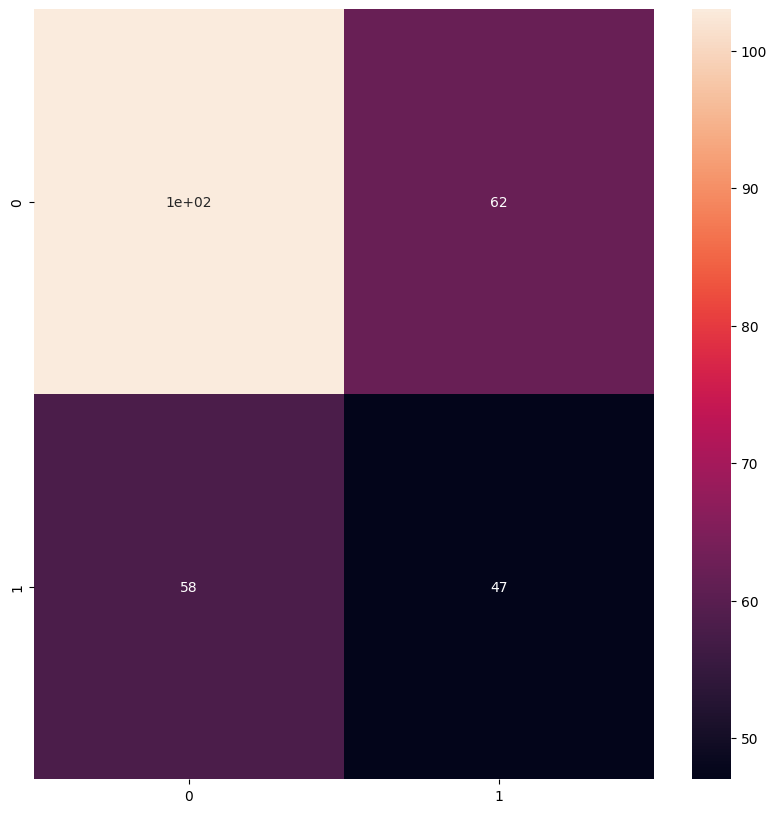

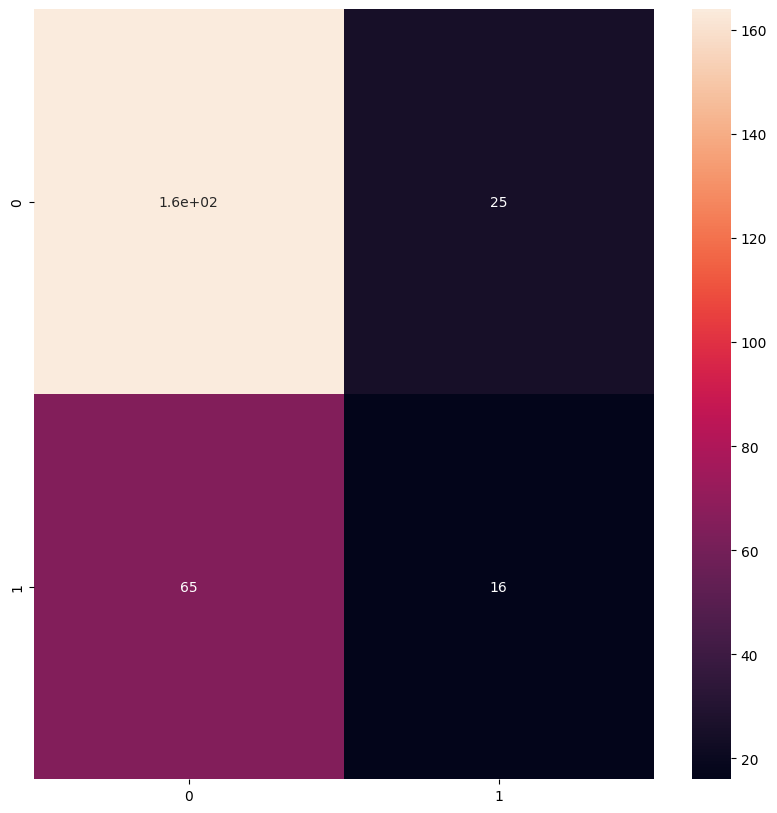

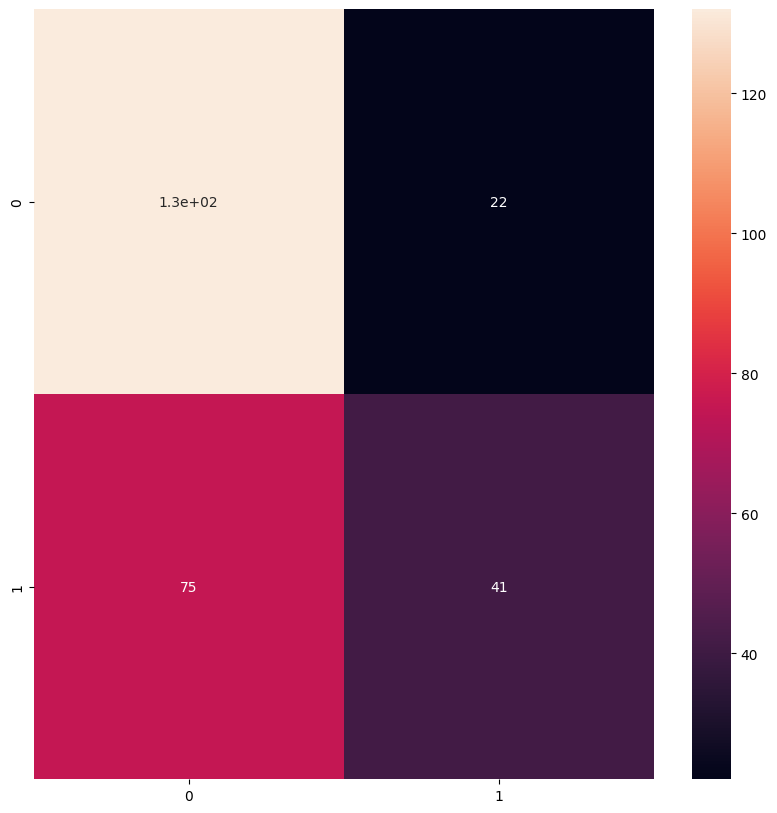

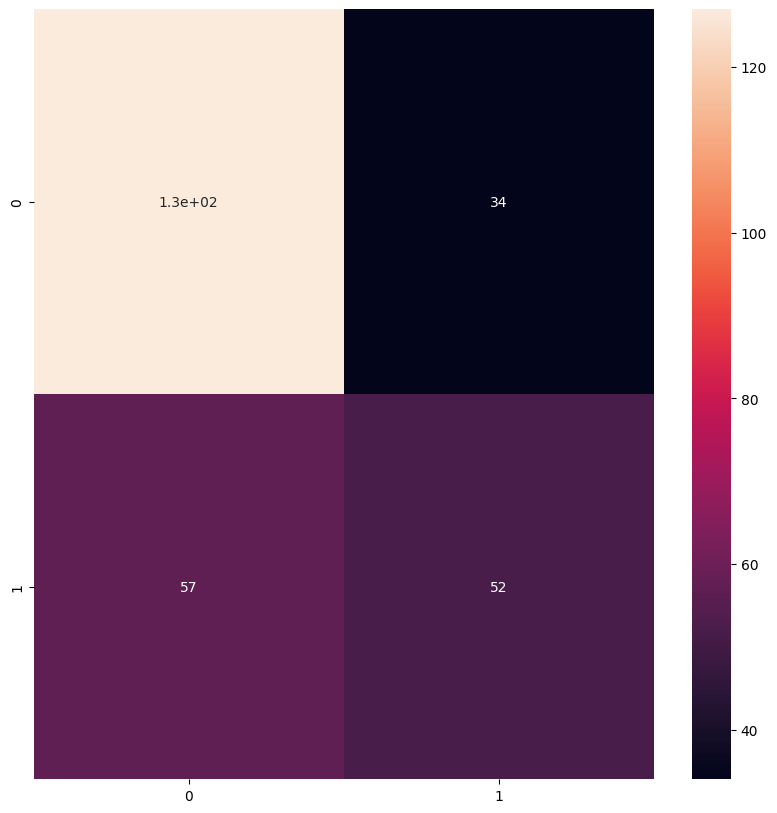

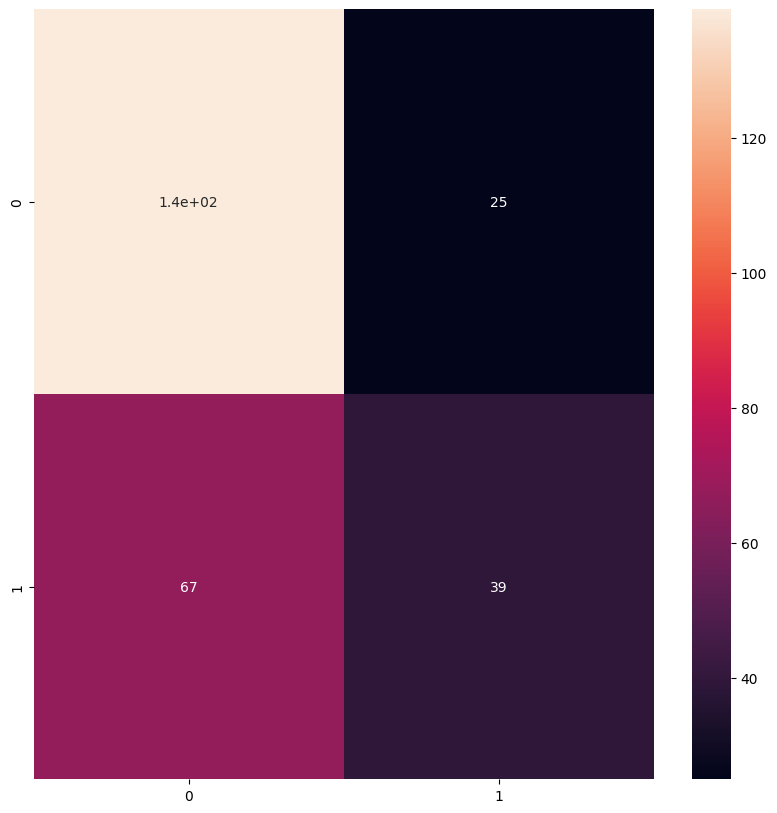

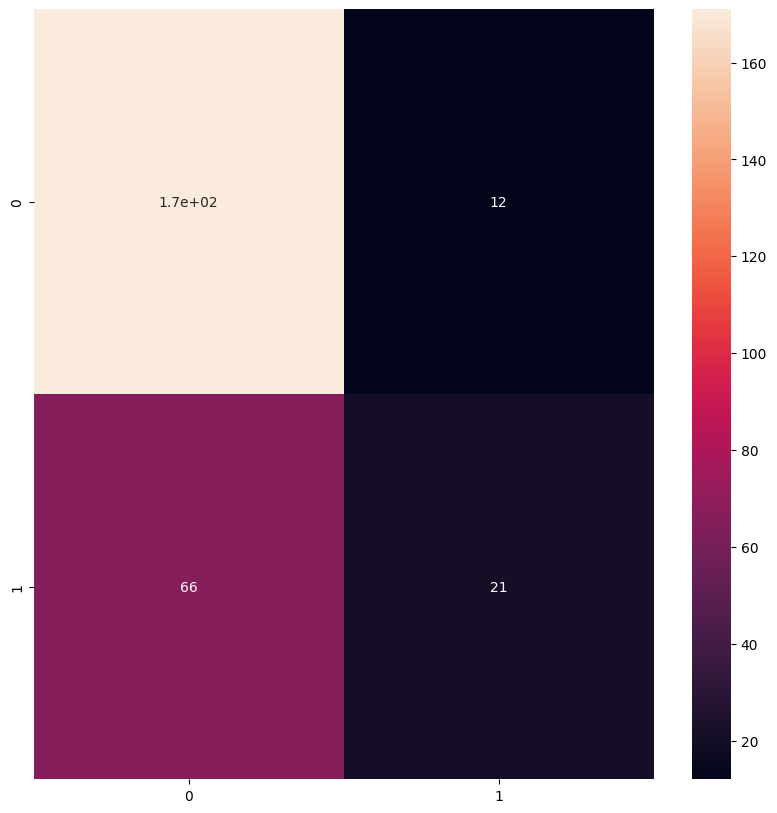

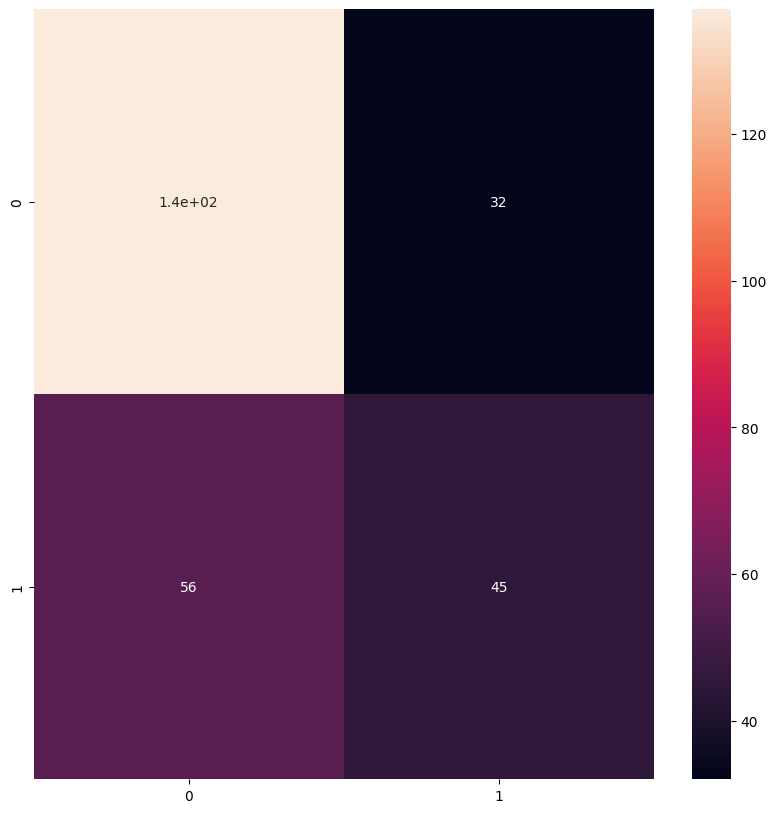

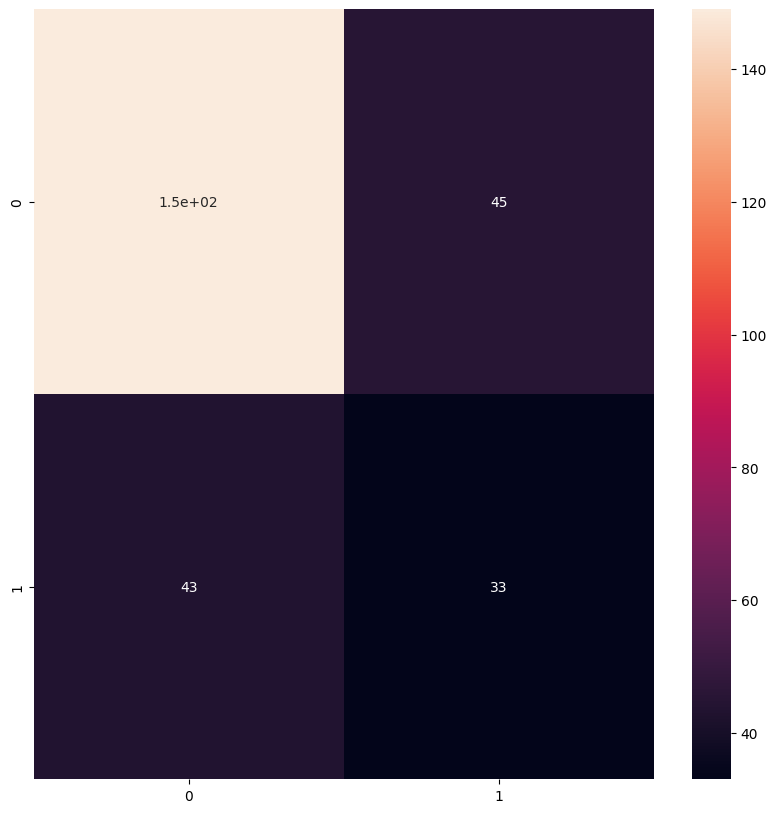

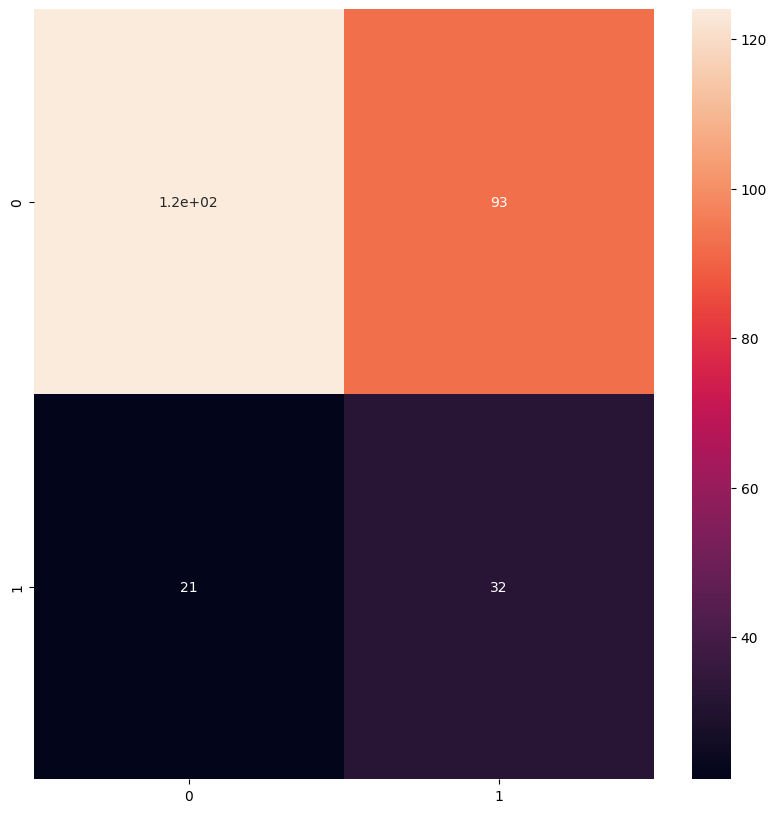

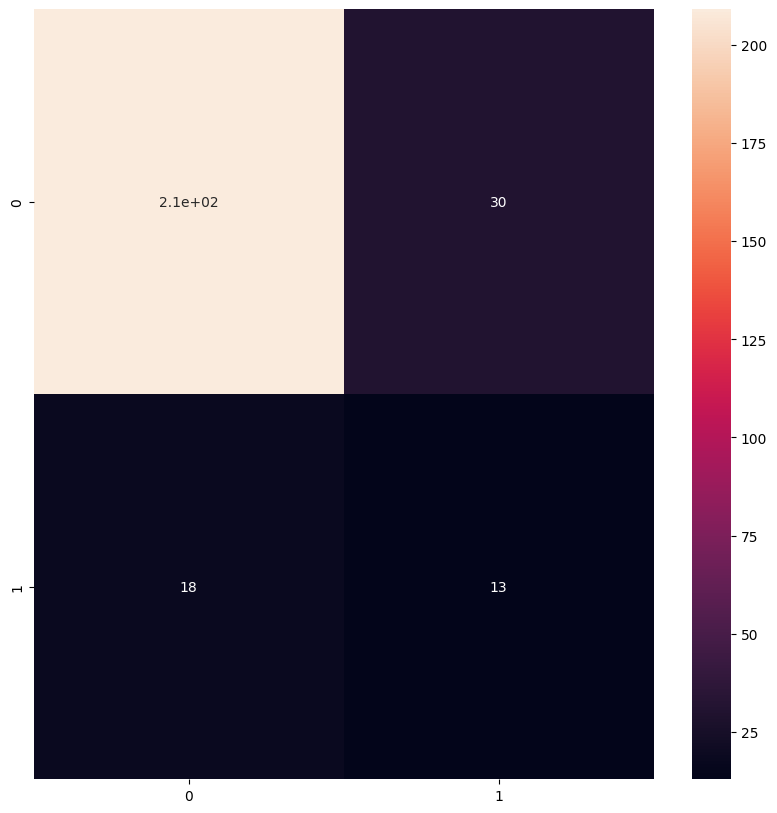

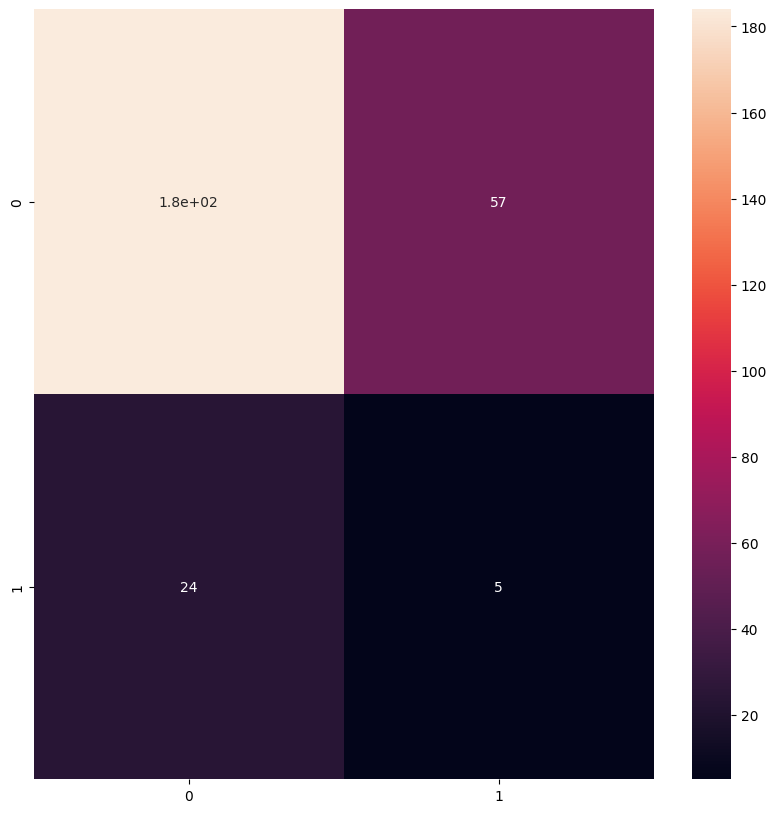

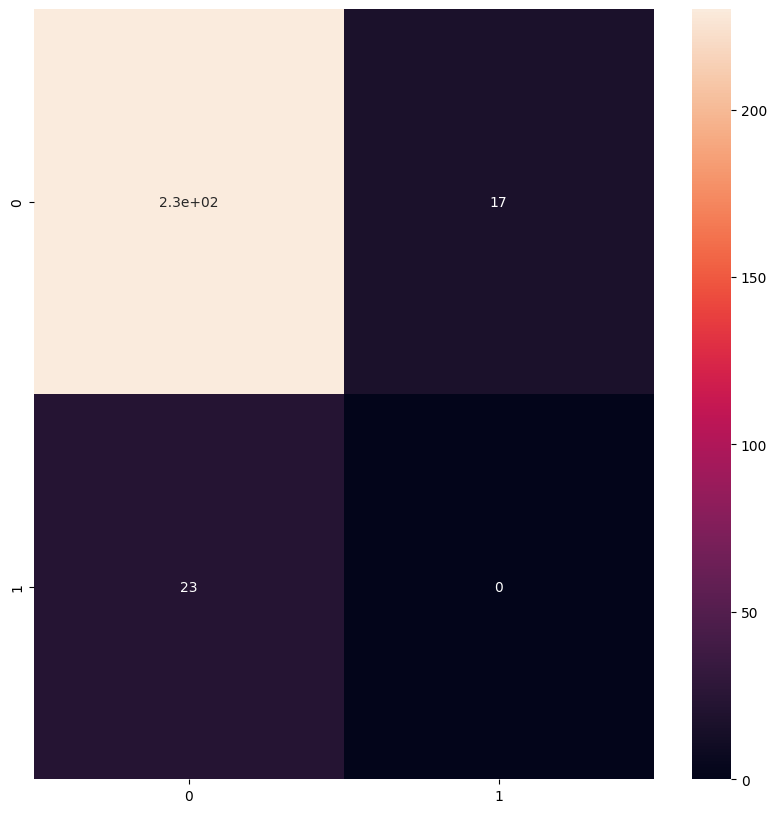

In [23]:
save_classification_results(results_df, target_data)

# Ingredients

In [38]:
def merge_ingredients(gt_data, predicted_data):
    ret_df = pd.DataFrame()
    ret_df['gt'] = gt_data.ingredients_list
    ret_df['pred'] = predicted_data['gpt-3_extracted']

    return ret_df

In [39]:
gt_data = pd.read_csv("llm_sampled_data.csv")
predicted_data = pd.read_csv("ingredients_extraction_results.csv")
ingredients_results = merge_ingredients(gt_data, predicted_data)

In [45]:
ingredients_results.dropna(inplace=True)

In [57]:
ingredients_results['gt'] = ingredients_results['gt'].str.split(", ")

In [ ]:
ingredients_results['pred'] = ingredients_results['pred'].apply(lambda x: ast.literal_eval(x))

In [65]:
ingredients_results.head()

,gt,pred
0,"[pumpkin seeds, reduced-fat cream cheese, goat...","[toasted pumpkin seeds, reduced-fat cream chee..."
1,"[margarine, potato starch, vegetable broth, ca...","[melted margarine, potato starch, vegetable br..."
2,"[chickpeas, carrot, parsnip, spring onions, eg...","[chickpeas, carrot, parsnip, spring onions, eg..."
3,"[butter, leeks, frozen peas, fresh spinach, ch...","[butter, leeks, frozen peas, torn fresh spinac..."
4,"[sugar, butter, flour]","[sugar, butter, flour]"


In [82]:
def calculate_metric_ingredients(ingredients_results):
    perc_pred_in_gt_all = []
    perc_gt_in_pred_all = []
    iou_all = []
    for _, row in ingredients_results.iterrows():
        gt = row['gt']
        pred = row['pred']
        len_gt = len(gt)
        len_pred = len(pred)

        perc_pred_in_gt = 0
        for el in pred:
            if el in gt:
                perc_pred_in_gt += 1
        perc_pred_in_gt /= len_gt
        perc_pred_in_gt_all.append(perc_pred_in_gt)

        perc_gt_in_pred = 0
        for el in gt:
            if el in pred:
                perc_gt_in_pred += 1
        perc_gt_in_pred /= len_pred
        perc_gt_in_pred_all.append(perc_gt_in_pred)

        iou_all.append(len(set(gt).intersection(set(pred))) / len(set(gt).union(set(pred))))

    return pd.DataFrame({'%_gt_in_pred': perc_gt_in_pred_all,
                         '%_pred_in_gt': perc_pred_in_gt_all,
                         'iou': iou_all})

In [83]:
metrics_ingredients = calculate_metric_ingredients(ingredients_results)

In [84]:
metrics_ingredients

,%_gt_in_pred,%_pred_in_gt,iou
0,0.500000,0.600000,0.375000
1,0.428571,0.500000,0.300000
2,1.000000,1.000000,1.000000
3,0.666667,0.750000,0.545455
4,1.000000,1.000000,1.000000
5,0.833333,1.000000,0.833333
6,0.875000,1.000000,0.875000
7,0.666667,0.800000,0.571429
8,1.000000,1.000000,1.000000
9,0.666667,0.800000,0.571429


In [158]:
metrics_ingredients.to_csv("ingredients_results.csv")

In [156]:
ingredients_ret_df = metrics_ingredients.mean(axis=0).reset_index().rename(columns={0: 'avg', 'index': 'metric'})
ingredients_ret_df

,metric,avg
0,%_gt_in_pred,0.787774
1,%_pred_in_gt,0.822988
2,iou,0.717857


In [157]:
ingredients_ret_df.to_csv("ingredients_result_metrics.csv")